In [14]:
import gymnasium
import numpy as np
import matplotlib.pyplot as plt
from evaluator import Evaluator

env = gymnasium.make("Gym-Gridworlds/Penalty-3x3-v0", render_mode="human")
env.reset()

n_states = env.observation_space.n
n_actions = env.action_space.n

R = np.zeros((n_states, n_actions))
P = np.zeros((n_states, n_actions, n_states))
T = np.zeros((n_states, n_actions))

for s in range(n_states):
    for a in range(n_actions):
        env.unwrapped.set_state(s)
        s_next, r, terminated, _, _ = env.step(a)
        R[s, a] = r
        P[s, a, s_next] = 1.0
        T[s, a] = terminated

In [15]:
policy = np.array([
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
])

def bellman_v(gamma, init_value):
    evaluator = Evaluator(env=env, initialization=init_value, gamma=gamma, threshold=0.01)
    evaluator.evaluate_state_values(policy=policy, R=R, P=P)
    values = evaluator.state_values.reshape(3,3)
    errors = evaluator.errors
    return values, errors

def bellman_q(gamma, init_value):
    evaluator = Evaluator(env=env, initialization=init_value, gamma=gamma, threshold=0.01)
    evaluator.evaluate_action_state_values(R=R, P=P)
    values = [evaluator.q_values[:, i].reshape(3,3) for i in range(n_actions)]
    errors = evaluator.errors
    return values, errors

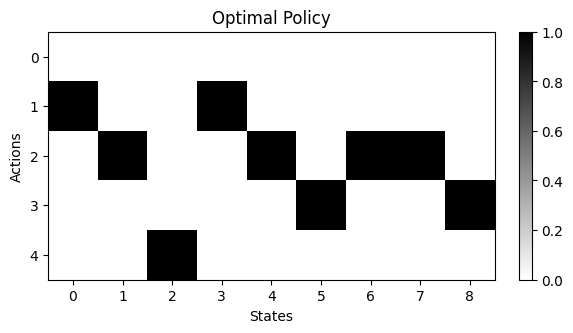

In [16]:
fig, axs = plt.subplots(1)
axs.set_title(f"Optimal Policy")
mappable = axs.imshow((policy).transpose(), cmap="binary")
axs.set_xlabel('States')
axs.set_ylabel('Actions')
plt.colorbar(mappable, ax=axs, orientation='vertical', fraction=0.05, pad=0.05, shrink=0.67)
plt.show()

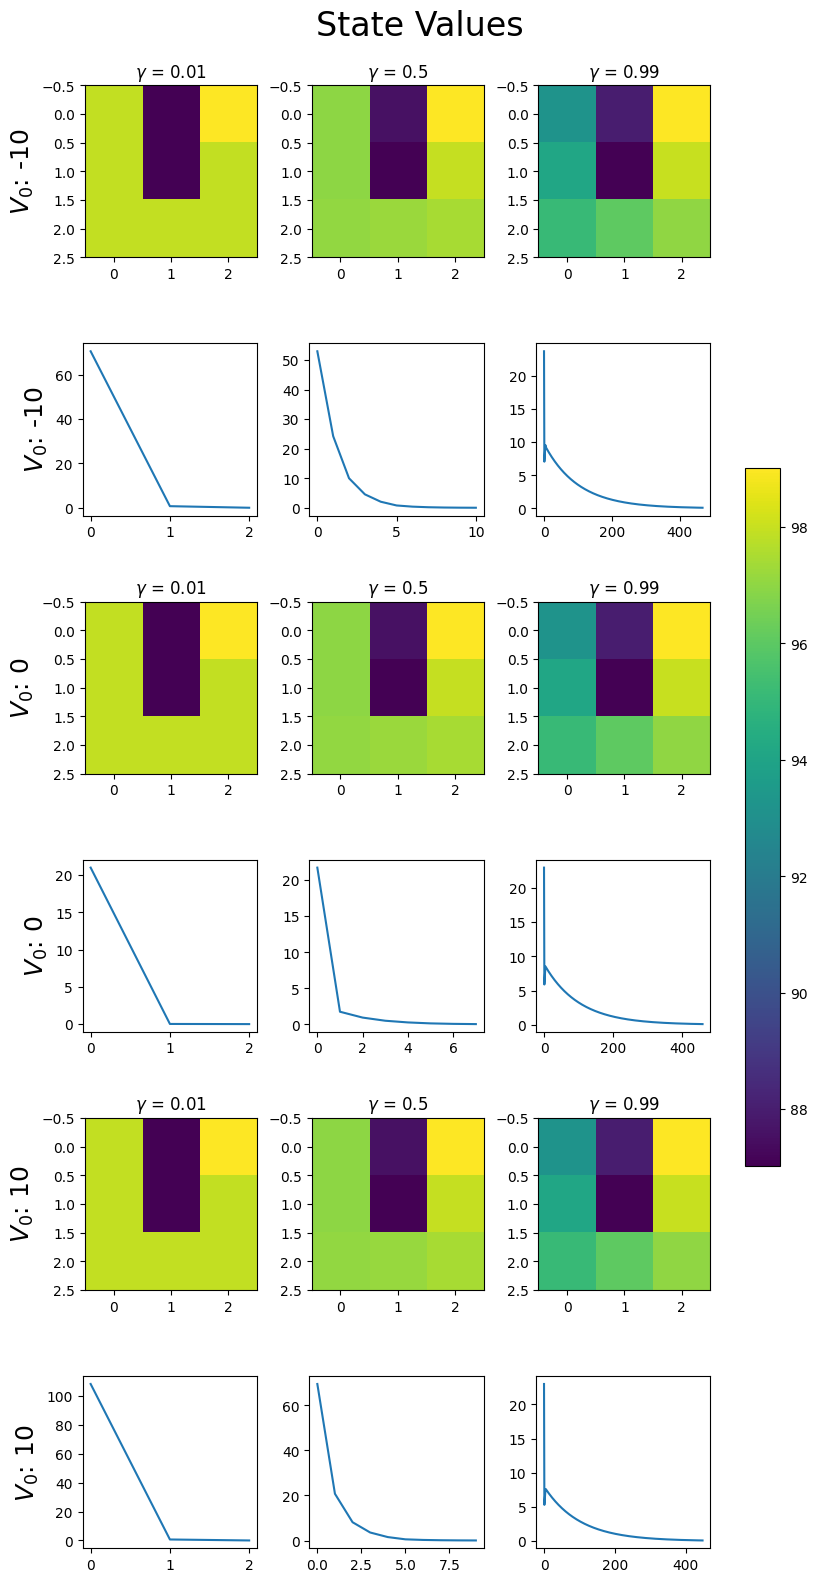

In [17]:
gammas = [0.01, 0.5, 0.99]
fig, axs = plt.subplots(6, len(gammas), figsize=(9, 19),
                            gridspec_kw={'wspace': 0.3, 'hspace': 0.5})
for row, init_value in zip([0,2,4], [-10, 0, 10]):
    fig.suptitle(f"State Values", fontsize=24, y=.92)
    axs[row][0].set_ylabel(f"$V_0$: {init_value}", fontsize=18)
    axs[row+1][0].set_ylabel(f"$V_0$: {init_value}", fontsize=18)
    for i, gamma in enumerate(gammas):
        values, errors = bellman_v(gamma=gamma, init_value=init_value)
        mappable = axs[row][i].imshow(values)
        axs[row+1][i].plot(errors)
        axs[row][i].set_title(f'$\gamma$ = {gamma}')

plt.colorbar(mappable, ax=axs[:,:], orientation='vertical', fraction=0.05, pad=0.05)
plt.show()

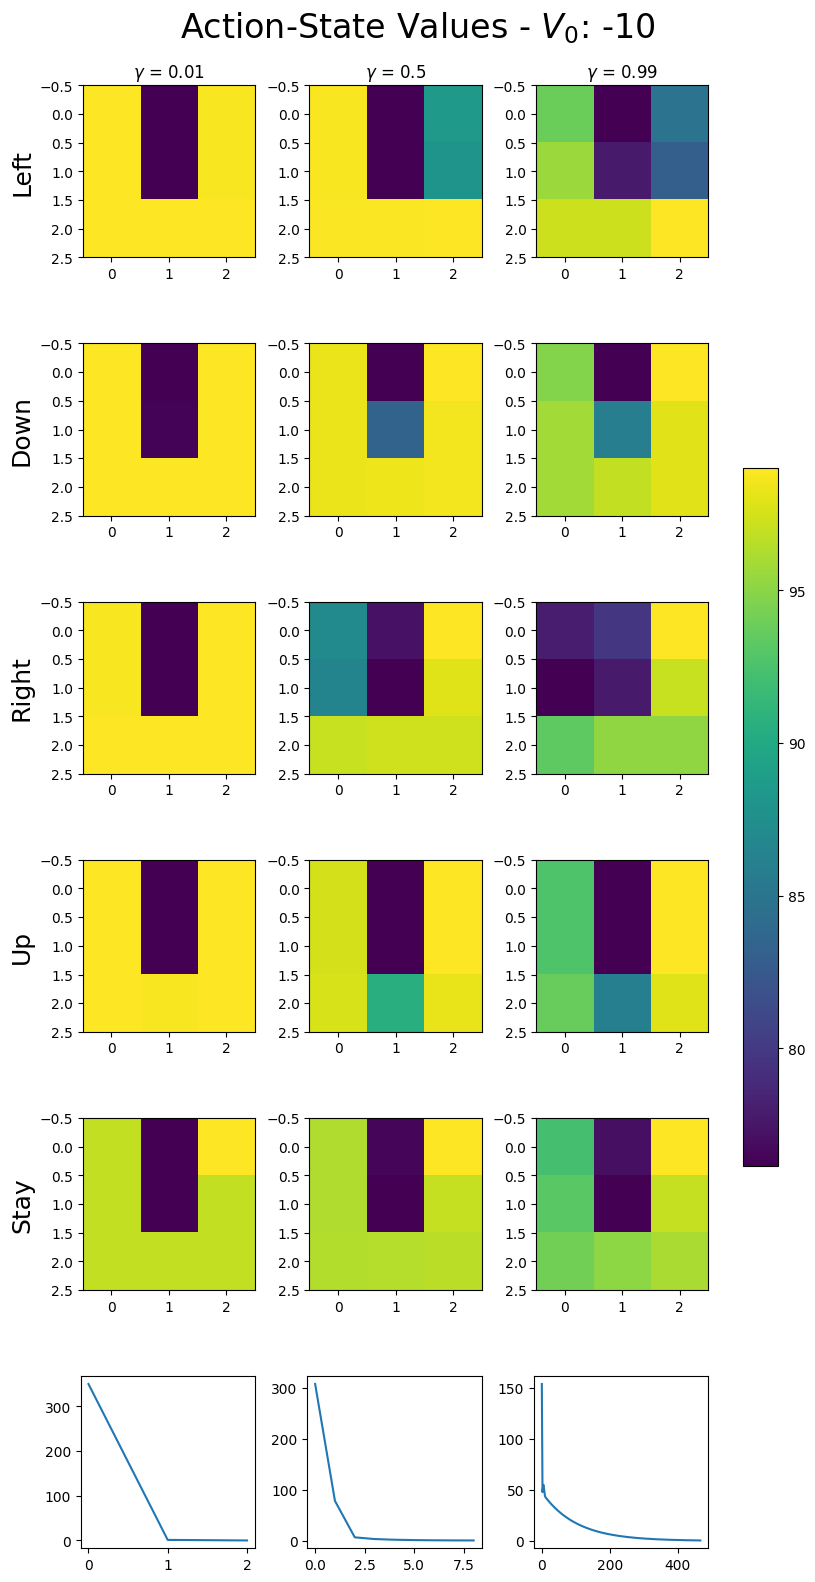

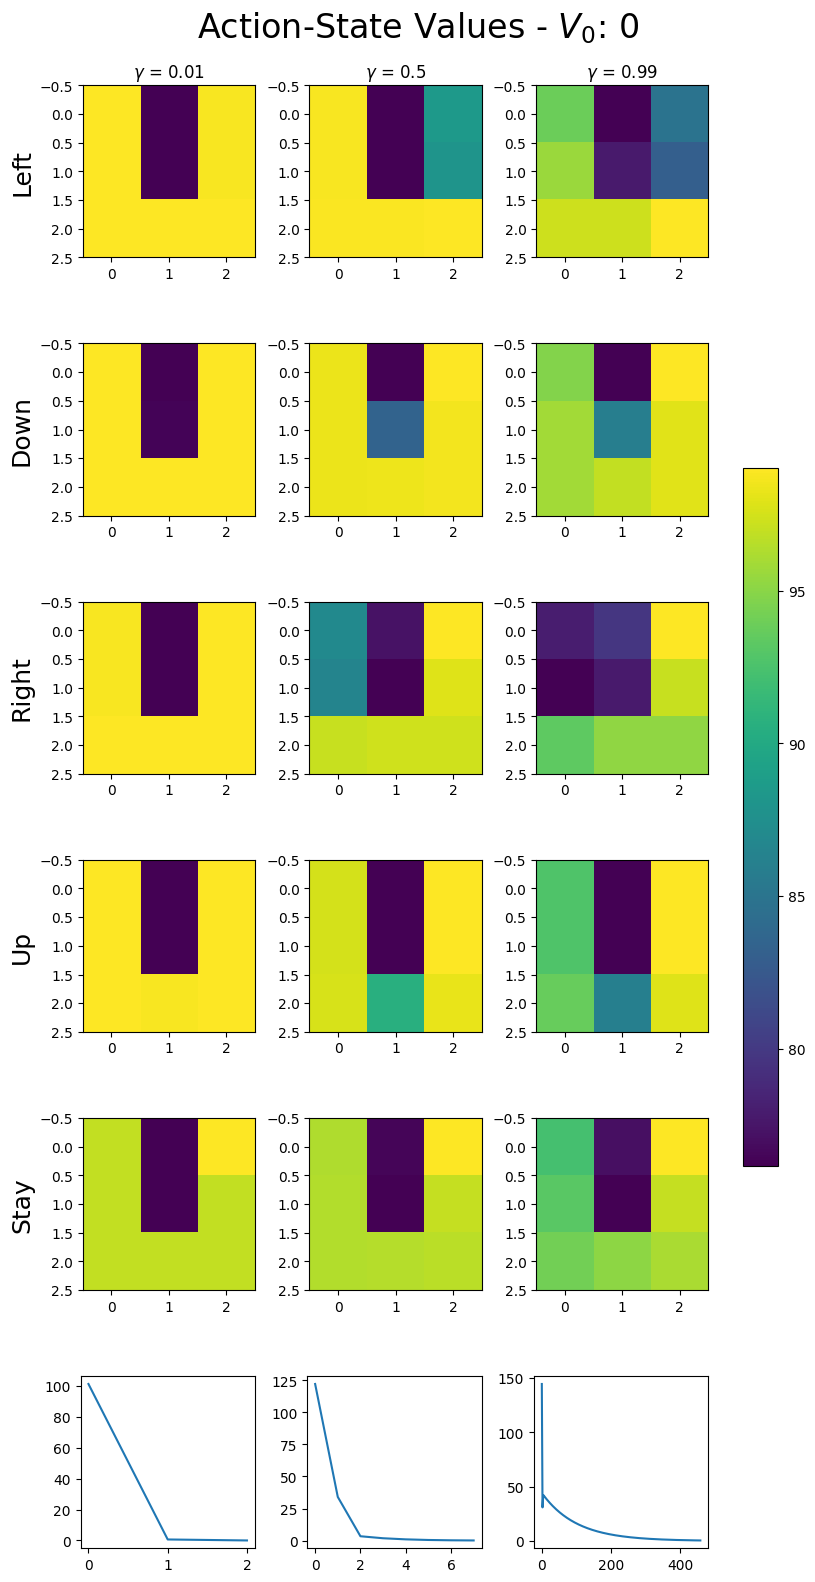

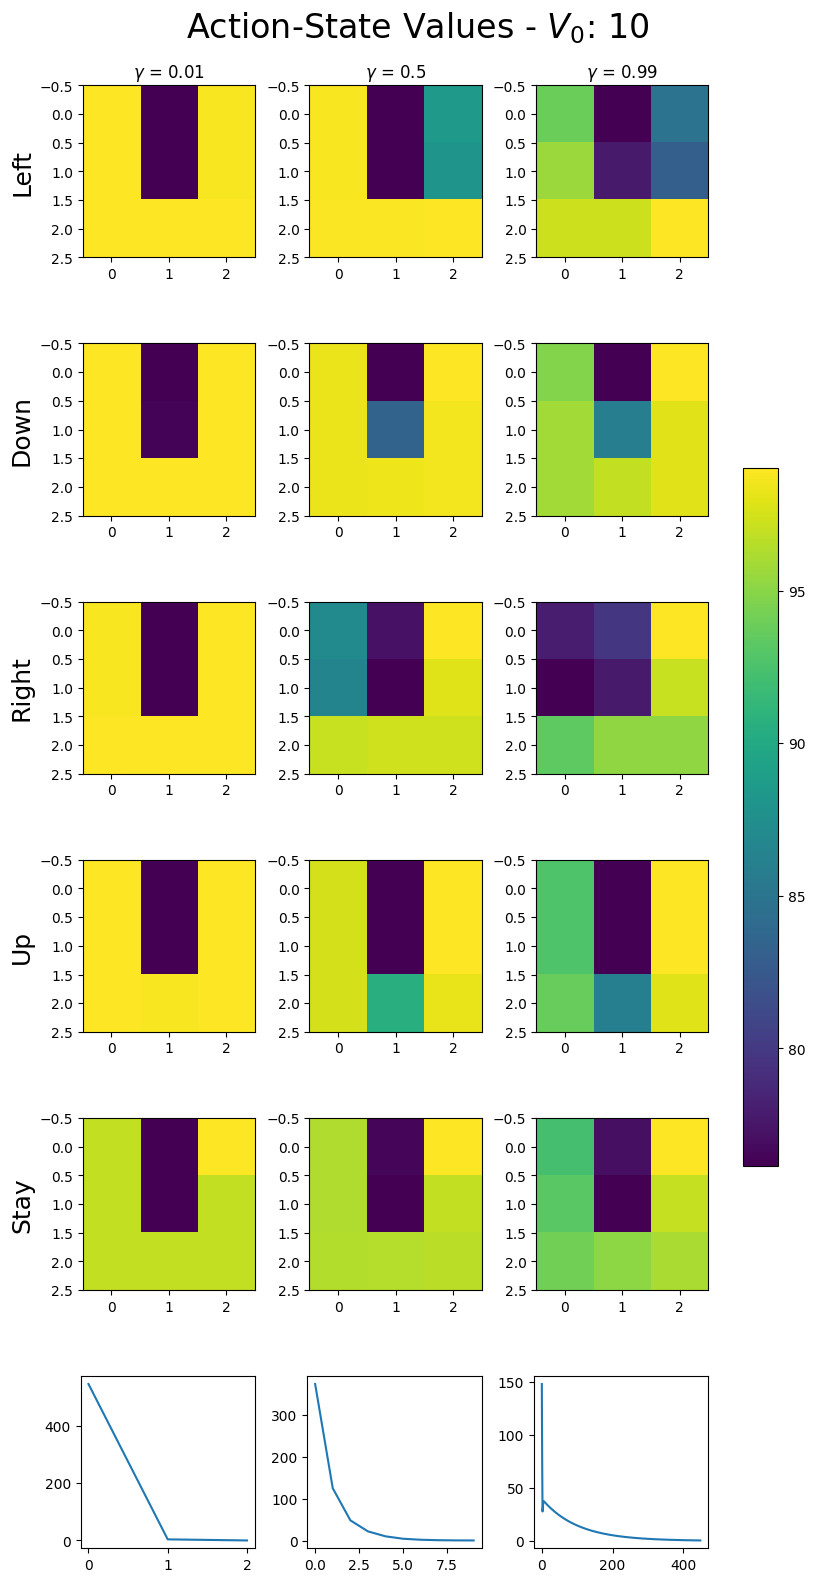

In [18]:
actions = {
    0: 'Left',
    1: 'Down',
    2: 'Right',
    3: 'Up',
    4: 'Stay'
}

gammas = [0.01, 0.5, 0.99]
for row, init_value in zip([0,2,4], [-10, 0, 10]):
    fig, axs = plt.subplots(6, len(gammas), figsize=(9, 19),
        gridspec_kw={'wspace': 0.3, 'hspace': 0.5})
    fig.suptitle(f"Action-State Values - $V_0$: {init_value}", fontsize=24, y=.92)
    # axs[row+1][0].set_ylabel(f"$V_0$: {init_value}", fontsize=18)
    for i, gamma in enumerate(gammas):
        values, errors = bellman_q(gamma=gamma, init_value=init_value)
        for a in range(n_actions):
            axs[a][0].set_ylabel(f"{actions[a]}", fontsize=18)
            mappable = axs[a][i].imshow(values[a], aspect='equal')
        axs[-1][i].plot(errors)
        axs[0][i].set_title(f'$\gamma$ = {gamma}')
    plt.colorbar(mappable, ax=axs[:,:], orientation='vertical', fraction=0.05, pad=0.05)
plt.show()